In [1]:
import numpy as np
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

In [2]:
nx = 9
ny = 6

# Find Chessboard Corners

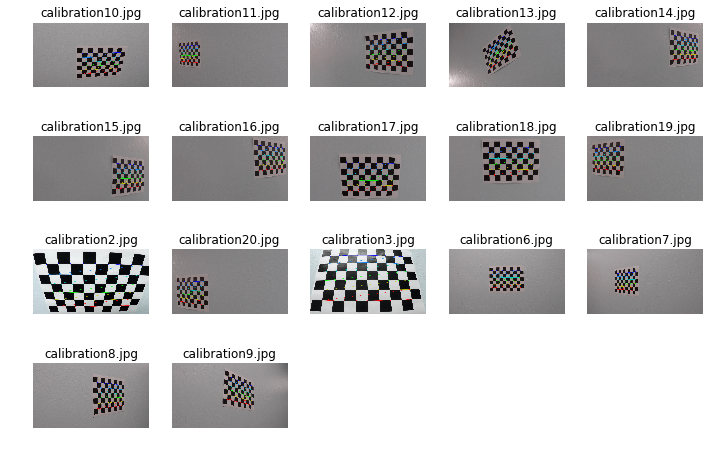

Used 17 images for camera calibration.


In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nx*ny,3), np.float32)
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Make a list of calibration images
images = glob.glob('camera_cal/calib*')
'''
images=['camera_cal/calibration1.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration3.jpg',
 'camera_cal/calibration4.jpg']
'''


fig_count = len(images)
cols = 5
rows = int(fig_count/cols)

plt.figure(figsize=(12, 8))
idx = 1
for fname in sorted(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        #corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        #imgpoints.append(corners2)
        
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.subplot(rows, cols, idx)
        plt.axis('off')
        plt.title(fname.split('/')[-1])
        plt.imshow(img)
        idx += 1

plt.savefig('output_images/chessboard_corners.jpg')
plt.show()

print("Used {} images for camera calibration.".format(idx-1))

# Calibrate Camera

In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Undistort a test image

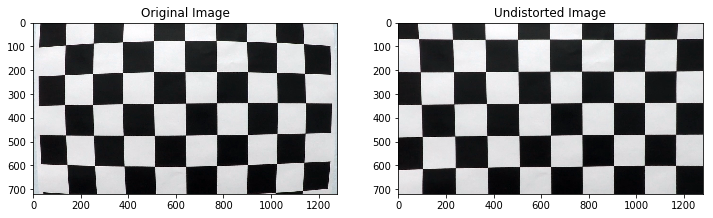

In [9]:
img = cv2.imread('camera_cal/calibration1.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title('Undistorted Image')
plt.imshow(dst)

plt.savefig('output_images/undistorted.jpg')
plt.show()

# Pickle objpoints and imgpoints

In [10]:
data = {}
data['mtx'] = mtx
data['dist'] = dist
pickle.dump(data, open( "output_images/camera_cal_mtx_dist.p", "wb" ))

print('Saved mtx and dist in pickle file.')

Saved mtx and dist in pickle file.


In [11]:
images

['camera_cal/calibration1.jpg',
 'camera_cal/calibration10.jpg',
 'camera_cal/calibration11.jpg',
 'camera_cal/calibration12.jpg',
 'camera_cal/calibration13.jpg',
 'camera_cal/calibration14.jpg',
 'camera_cal/calibration15.jpg',
 'camera_cal/calibration16.jpg',
 'camera_cal/calibration17.jpg',
 'camera_cal/calibration18.jpg',
 'camera_cal/calibration19.jpg',
 'camera_cal/calibration2.jpg',
 'camera_cal/calibration20.jpg',
 'camera_cal/calibration3.jpg',
 'camera_cal/calibration4.jpg',
 'camera_cal/calibration5.jpg',
 'camera_cal/calibration6.jpg',
 'camera_cal/calibration7.jpg',
 'camera_cal/calibration8.jpg',
 'camera_cal/calibration9.jpg']